# Gradienten Verfahren

## Anwendung

In [1]:
from ngsolve import *
from netgen.geom2d import unit_square
import matplotlib.pyplot as plt
from myst_nb import glue

In [2]:
mesh = Mesh(unit_square.GenerateMesh(maxh=0.1))

In [3]:
fes = H1(mesh, order=1)
u,v = fes.TnT()
a = BilinearForm(grad(u)*grad(v)*dx+10*u*v*dx).Assemble()
f = LinearForm(1*v*dx).Assemble()
gfu = GridFunction(fes)

In [4]:
r = f.vec.CreateVector()
p = f.vec.CreateVector()

gfu.vec[:] = 0
r.data = f.vec
err0 = Norm(r)
errs = []
its = 0
while True:
    p.data = a.mat * r
    err2 = InnerProduct(r,r)
    err = sqrt(err2)
    errs.append(err)
    alpha = err2 / InnerProduct(r,p)
    
    #print ("iteration", its, "res=", err)
    gfu.vec.data += alpha * r
    r.data -= alpha * p
    if sqrt(err2) < 1e-8 * err0 or its > 10000: break
    its += 1
print ("needed", its, "iterations")

needed 732 iterations


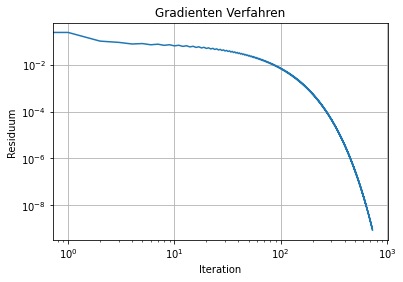

In [5]:
fig, ax = plt.subplots()
ax.loglog(errs)
ax.grid()
ax.set_title('Gradienten Verfahren: '+str(its)+' iterationen')
ax.set_xlabel('Iteration')
ax.set_ylabel('Residuum')
glue("FEM_GradientenVerfahren_fig", fig, display=False)